<a href="https://colab.research.google.com/github/ayanokoji024/friendly-potato/blob/main/Iris_Dataset_ML_Lab_Assignment_1_020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [63]:
# Imports
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

### Loading Iris dataset and storing it in a panda dataframe

In [64]:
iris = load_iris()
# print(iris)

df = pd.DataFrame(iris.data, columns= iris.feature_names)
df['target'] = iris.target # ground class stored in 'target' column/field of the dataframe
# 'setosa' == 0, 'versicolor' == 1, 'virginica' == 2

print(df)
print(iris.feature_names)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

### Splitting the dataset into training and testing datasets

In [65]:
features = iris.feature_names # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X = df[features]
y = df['target']

# now we can split the dataset into training and testing dataset according to any ratio as per the 'train_test_split' function of sklearn.model_selection module:
# train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = 0.2)
# since we have to use the same piece of code again and again (except for different parameters),
# a function can be defined for calculating the various measures of the decision tree model for the sake of code re-usability

def decision_tree_model_iris(test_ratio, X, y, criterion_string="entropy"):


  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  decision_tree_model = DecisionTreeClassifier(random_state=0, max_depth = 4, criterion=criterion_string)
  decision_tree_model.fit(train_X, train_y)

  pred_y = decision_tree_model.predict(test_X)
  print("Classification report for decision tree model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

  # Create a figure and axis for the decision tree plot
  fig, ax = plt.subplots(figsize=(12, 8))

  # Plot the decision tree
  tree.plot_tree(decision_tree_model, feature_names=features, class_names=['setosa','versicolor','virginica'], filled=True, rounded=True, ax=ax)

  # Add a title
  ax.set_title('Decision Tree Plot')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()

  # Show the decision tree plot
  plt.show()

For test-train ratio of 0.2 to 0.8
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      1.00      0.84         8
           2       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.89        30
weighted avg       0.93      0.90      0.90        30

[[11  0  0]
 [ 0  8  0]
 [ 0  3  8]]


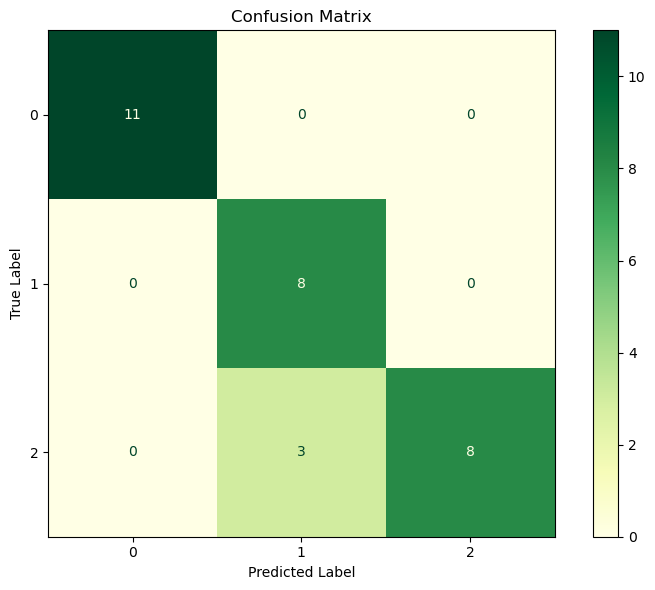

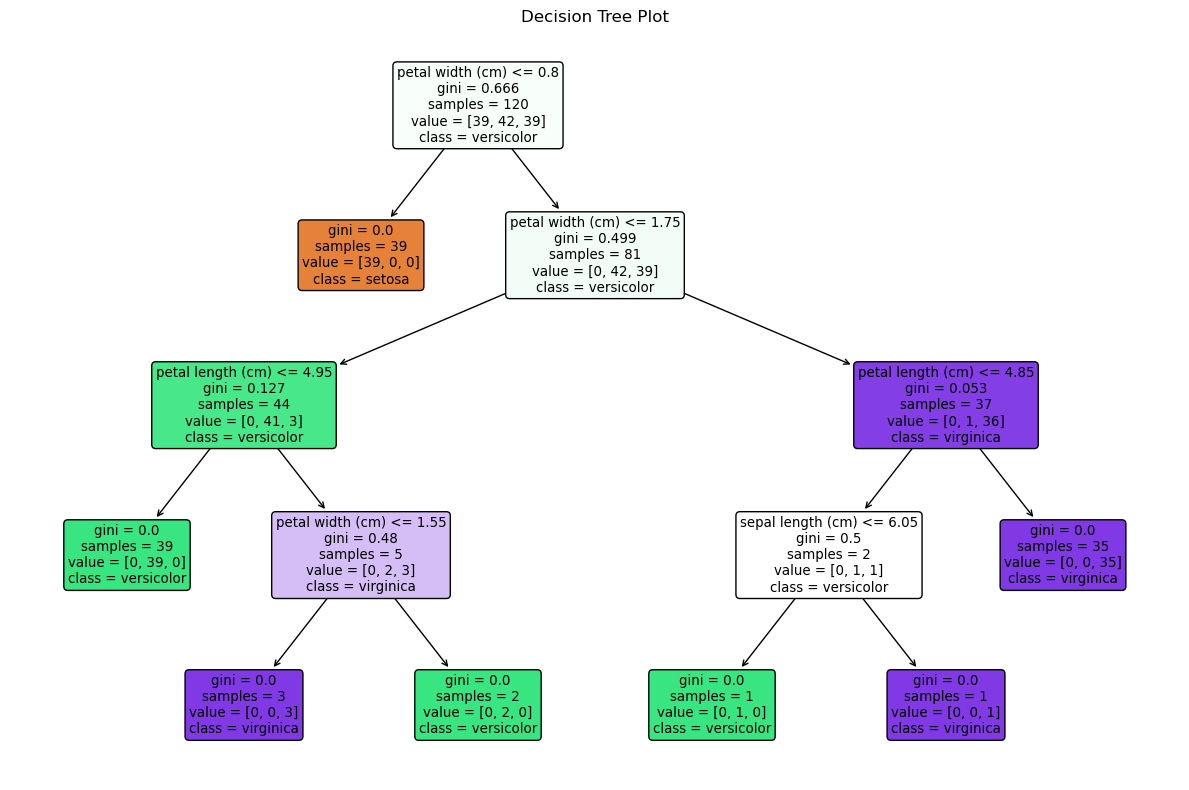

In [66]:
print("For test-train ratio of 0.2 to 0.8")
decision_tree_model_iris(0.2,X,y,"gini")



For test-train ratio of 0.3 to 0.7
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.95      0.90      0.93        21

    accuracy                           0.93        45
   macro avg       0.92      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

[[14  0  0]
 [ 0  9  1]
 [ 0  2 19]]


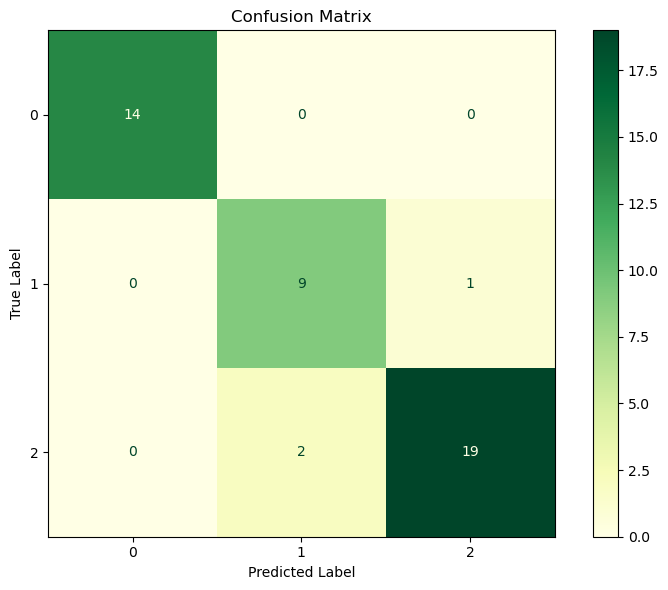

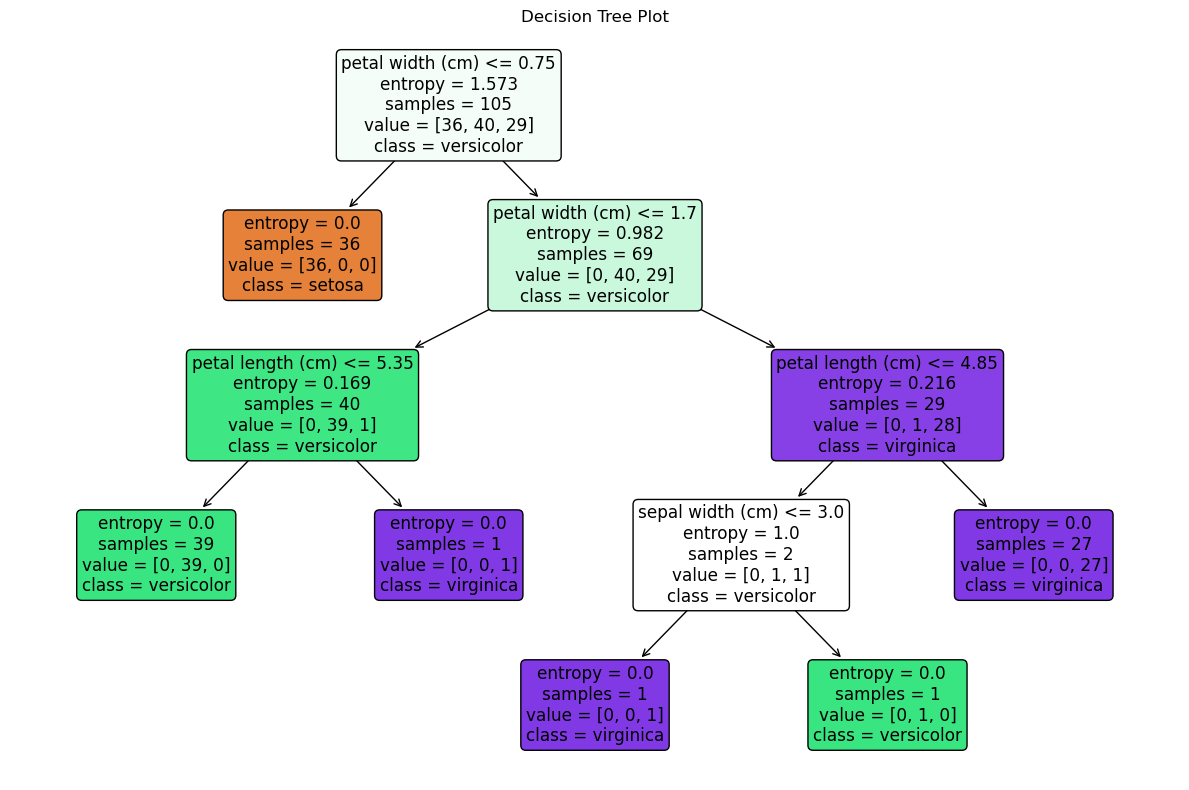

In [67]:
print("\nFor test-train ratio of 0.3 to 0.7")
decision_tree_model_iris(0.3,X,y)



For test-train ratio of 0.4 to 0.6
Classification report for decision tree model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.94      0.94      0.94        16
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60

[[24  0  0]
 [ 0 15  1]
 [ 0  1 19]]


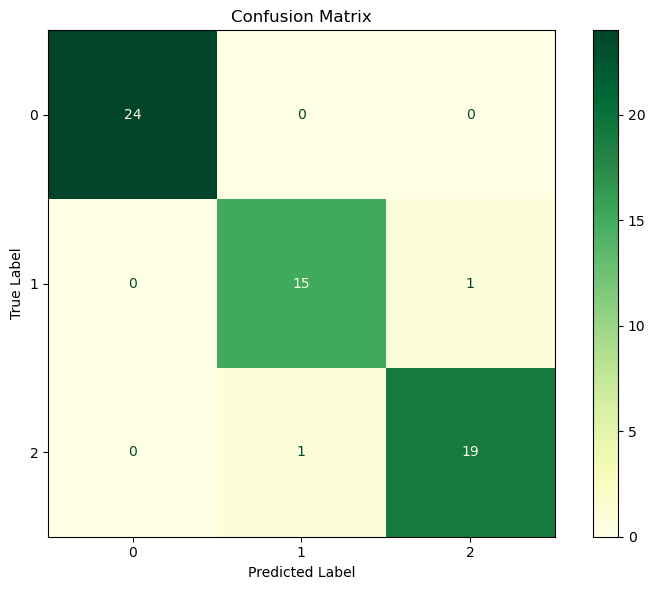

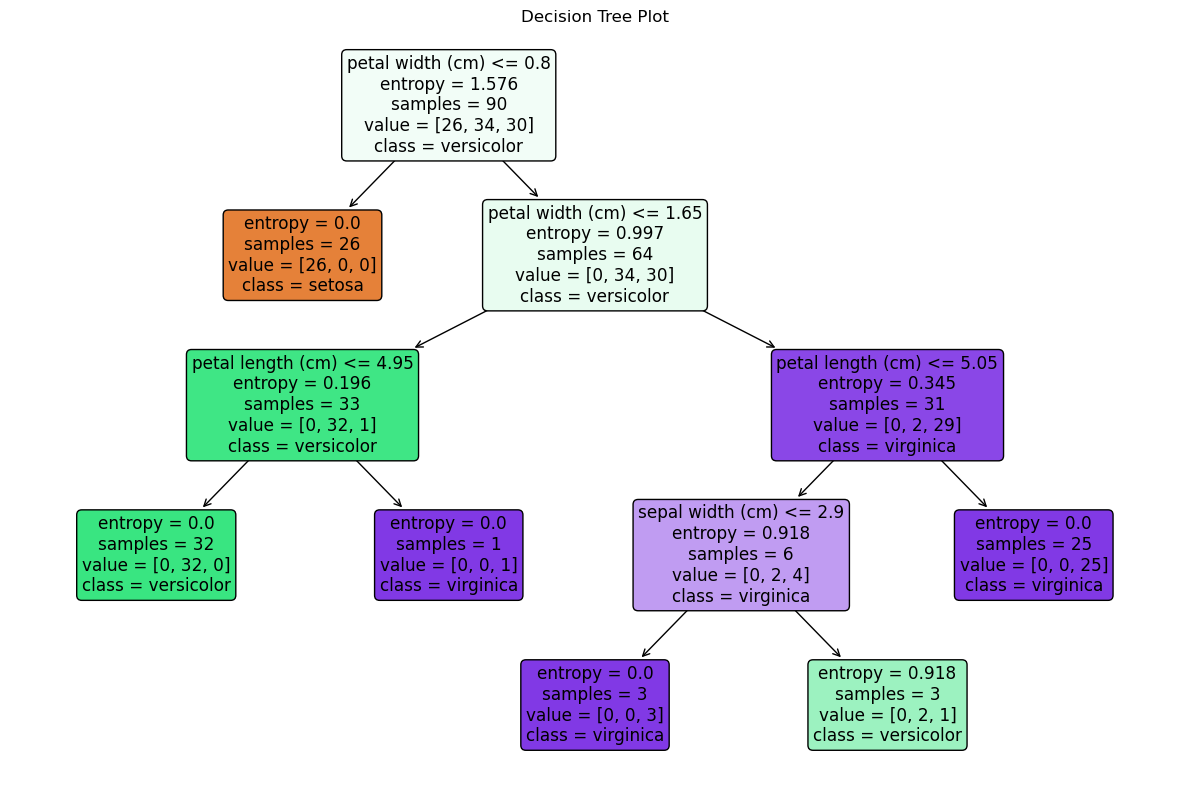

In [68]:
print("\nFor test-train ratio of 0.4 to 0.6")
decision_tree_model_iris(0.4,X,y)

### Naive Bayes

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

def multinomialNB_model_iris(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = MultinomialNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Multinomial Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def gaussianNB_model_iris(test_ratio, X, y, smooth = 1e-9):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  model = GaussianNB(var_smoothing=smooth)
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Gaussian Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

def bernoulliNB_model_iris(test_ratio, X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=None, test_size = test_ratio)
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  model = BernoulliNB()
  model.fit(train_X, train_y)
  model = BernoulliNB()
  model.fit(train_X, train_y)

  pred_y = model.predict(test_X)
  print("Classification report for Bernoulli Naive Bayes model:\n")
  print(classification_report(y_true = test_y, y_pred=pred_y))
  cm = confusion_matrix(test_y, pred_y)
  print(cm)

  fig, ax = plt.subplots(figsize=(8, 6))
  cm_display = (ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_))
  cm_display.plot(ax=ax, cmap='YlGn', values_format='d')

  # Add a title and labels
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Label')
  ax.set_ylabel('True Label')

  # Adjust the layout to avoid overlapping
  plt.tight_layout()
  # Show the Confusion Matrix
  plt.show()

Classification report for Multinomial Naive Bayes model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.45      1.00      0.62        13
           2       1.00      0.16      0.27        19

    accuracy                           0.64        45
   macro avg       0.82      0.72      0.63        45
weighted avg       0.84      0.64      0.58        45

[[13  0  0]
 [ 0 13  0]
 [ 0 16  3]]


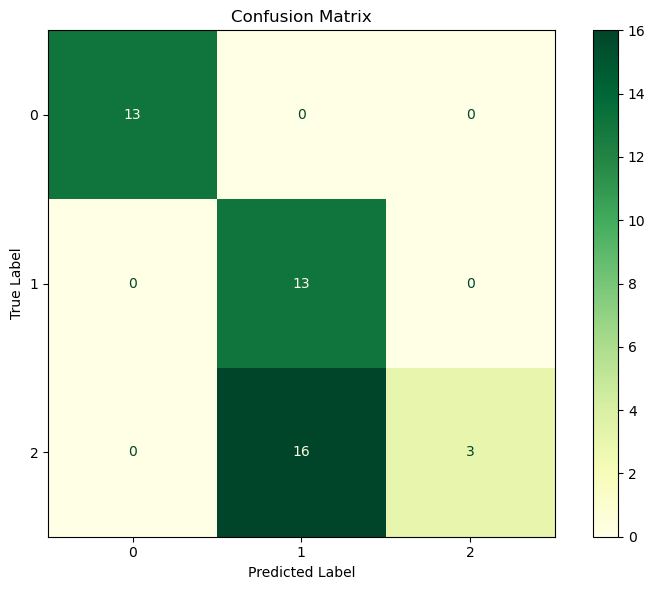

In [70]:
multinomialNB_model_iris(0.3,X,y)

Classification report for Gaussian Naive Bayes model:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.88      0.91        17
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[14  0  0]
 [ 0 15  2]
 [ 0  1 13]]


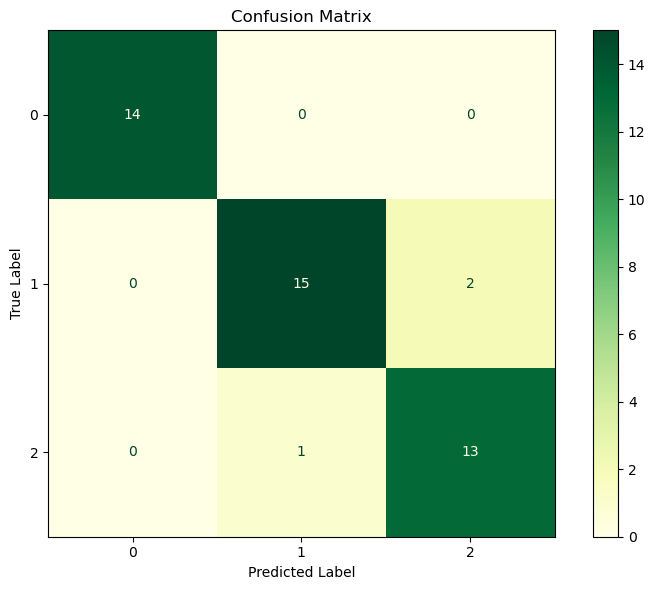

In [71]:
gaussianNB_model_iris(0.3,X,y)

Classification report for Bernoulli Naive Bayes model:

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.70      0.47      0.56        15
           2       0.71      0.80      0.75        15

    accuracy                           0.76        45
   macro avg       0.75      0.76      0.74        45
weighted avg       0.75      0.76      0.74        45

[[15  0  0]
 [ 3  7  5]
 [ 0  3 12]]


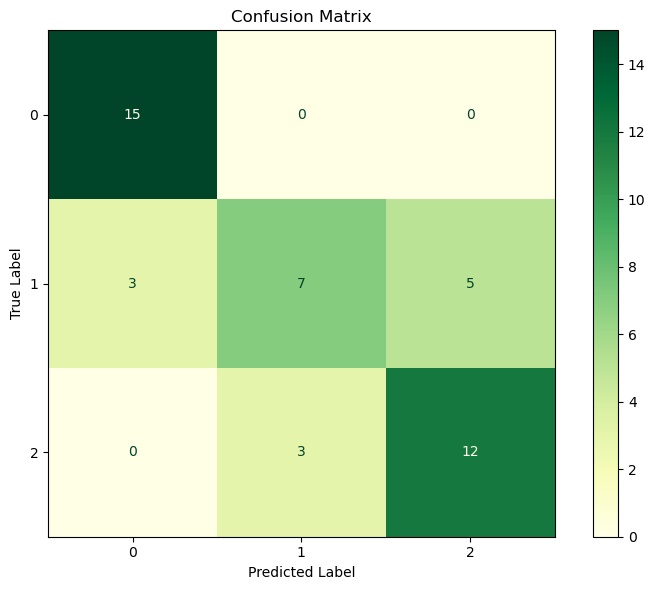

In [72]:
bernoulliNB_model_iris(0.3,X,y)